Let's look at stuff.

In [34]:
## dataframe libraries
import pandas as pd
import numpy as np

## plotting libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [40]:
df = pd.read_csv('../data/JP_STOPS_MEASURES.csv')

print(df.columns)
print("{} rows".format(len(df)))

Index(['Unnamed: 0', 'name', 'utterance_label', 'utterance_start',
       'utterance_end', 'C1_start', 'C1_end', 'V1_start', 'V1_end', 'C2_start',
       'C2_end', 'V2_start', 'V2_end', 'release', 'voicing', 'speaker',
       'speaker_trial', 'speaker_id', 'recording_date', 'birth_year',
       'birth_date', 'gender', 'dialect_eng', 'birthplace_eng',
       'eight_regions_of_Japan_eng', 'prefecture_eng',
       'province_of_Japan_(administrative_divisions_of_Japan_from_the_600s_to_1868)_eng',
       'dialect_jpn', 'birthplace_jpn', 'eight_regions_of_Japan_jpn',
       'prefecture_jpn',
       'province_of_Japan_(administrative_divisions_of_Japan_from_the_600s_to_1868)_jpn',
       'Linguistic_environment', 'Father's_birthplace', 'Mother's_birthplace',
       '備考', 'serial_mumber', 'trial', 'label(order_in_a_trial)', 'word_kanji',
       'word_phonemic', 'meaning', 'consonant', 'vowel', 'place',
       'phone_voicing', 'type', 'VOT', 'F0'],
      dtype='object')
3624 rows


In [152]:
## remove missing pitch and VOT values
df = df.dropna(subset = ['F0', 'VOT'])

## check number of tokens per dialect
print(df.groupby(['dialect_eng']).size())

dialect_eng
Aichi_Owari         57
Ehime_Iyo          137
Hiroshima_Aki       44
Hyogo_Settsu        49
Kobe               527
Kyoto_Yamachiro     47
Osaka_Kawachi       50
Osaka_Settsu       372
Saga               557
Shiga_Oumi          40
Tokyo              536
Unpaku              41
dtype: int64


<ipython-input-59-8033525a5045>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  speakerdf = df.groupby(['speaker', 'phone_voicing'], as_index = False)['VOT', 'F0'].mean()


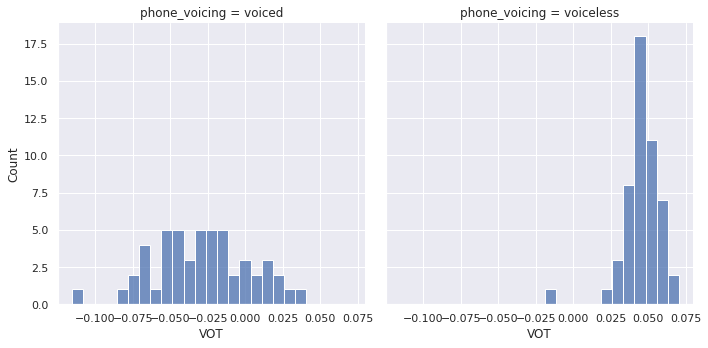

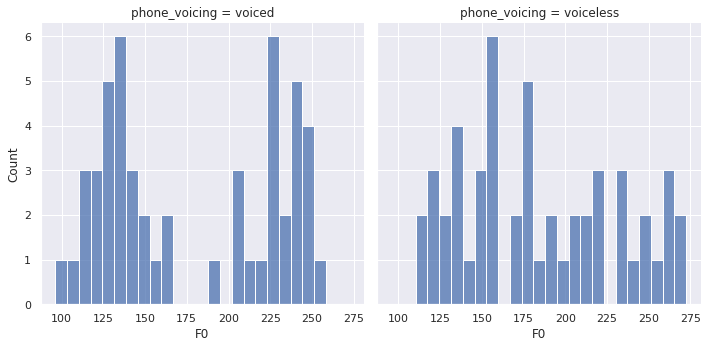

In [59]:
## plot VOT by phone voicing
#sns.displot(df, x = 'VOT', col = 'phone_voicing')

## and averaging for speakers' average voiced/voiceless values
speakerdf = df.groupby(['speaker', 'phone_voicing'], as_index = False)['VOT', 'F0'].mean()

sns.displot(speakerdf, x = 'VOT', col = 'phone_voicing', bins = 25)
sns.displot(speakerdf, x = 'F0', col = 'phone_voicing', bins = 25)
## plot F0 by phone voicing
#sns.displot(df, x = 'F0', col = 'phone_voicing')

Let's see how individual dialects use the acoustic cues for marking voiced and voiceless stops.

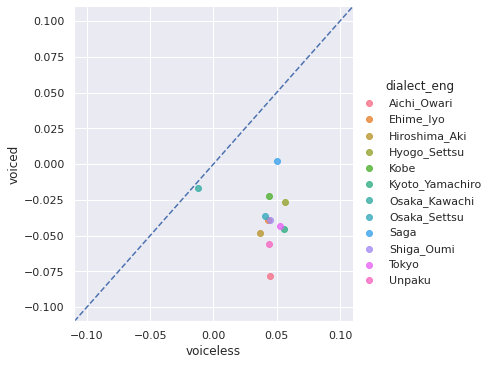

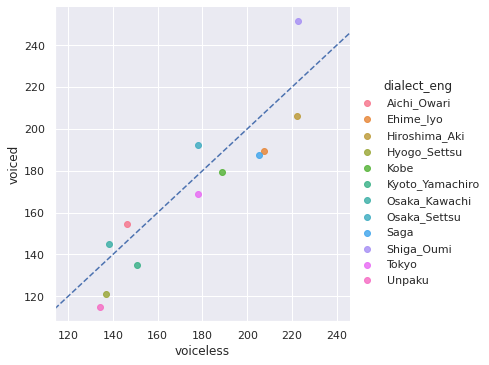

In [294]:
## Get each speaker's mean voiced and voiceless VOT
DialectVOTDf = (df.groupby(['speaker', 'dialect_eng', 'phone_voicing'], as_index = False)['VOT'].mean()
                
                ## Get dialect as a mean of speaker means
                .groupby(['dialect_eng', 'phone_voicing'], as_index = False)['VOT'].mean()
                
                ## convert phone voicings into separate columns
                .pivot(index = 'dialect_eng', columns = 'phone_voicing', values = 'VOT').reset_index()
)

## plot dialect-average voiced and voiceless VOTs
## add abline
sns.lmplot(x = 'voiceless', y = 'voiced', hue = 'dialect_eng', data = DialectVOTDf, fit_reg = False)
plt.axline((-0.1, -0.1), (0.1, 0.1), linestyle = "--")

## do the same for F0
DialectF0Df = (df.groupby(['speaker', 'dialect_eng', 'phone_voicing'], as_index = False)['F0'].mean()
               .groupby(['dialect_eng', 'phone_voicing'], as_index = False)['F0'].mean()
               .pivot(index = 'dialect_eng', columns = 'phone_voicing', values = 'F0').reset_index()
)
sns.lmplot(x = 'voiceless', y = 'voiced', hue = 'dialect_eng', data = DialectF0Df, fit_reg = False)
plt.axline((120, 120), (240, 240), linestyle = '--')

<ipython-input-293-0d7c1de49e61>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DialectContrastDf = (df.groupby(['speaker', 'dialect_eng', 'phone_voicing'], as_index = False)['VOT', 'F0'].mean()


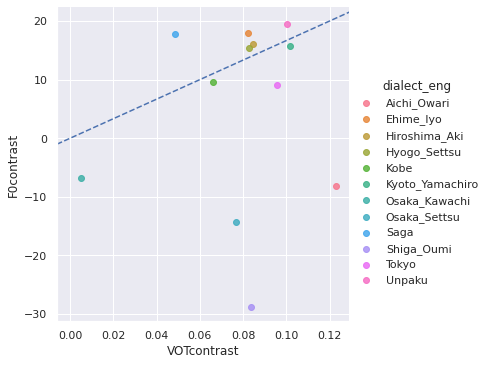

In [293]:
## now plot the dialectal-difference in the relationship between the VOT and F0 voicing contrast
DialectContrastDf = (df.groupby(['speaker', 'dialect_eng', 'phone_voicing'], as_index = False)['VOT', 'F0'].mean()
                     .groupby(['dialect_eng', 'phone_voicing'], as_index = False)['VOT', 'F0'].mean()
                     .pivot(index = 'dialect_eng', columns = 'phone_voicing', values = ['VOT', 'F0']).reset_index())

DialectContrastDf['VOTcontrast'] = DialectContrastDf['VOT']['voiceless'] - DialectContrastDf['VOT']['voiced']
DialectContrastDf['F0contrast'] = DialectContrastDf['F0']['voiceless'] - DialectContrastDf['F0']['voiced']

sns.lmplot(x = 'VOTcontrast', y = 'F0contrast', hue = 'dialect_eng', data = DialectContrastDf, fit_reg = False)
plt.axline((0,0), (0.12, 20), linestyle = '--')